In [ ]:
!pip install easyocr

In [ ]:
!pip uninstall opencv-python-headless -y

In [ ]:
!pip uninstall opencv-python

In [ ]:
!pip install opencv-python

In [1]:
import cv2
import matplotlib.pyplot as plt

In [3]:
image = plt.imread("car1.jpg").copy()

In [5]:
image.shape

(742, 1200, 3)

In [7]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

In [9]:
gray.shape

(742, 1200)

In [11]:
742 * 1200

890400

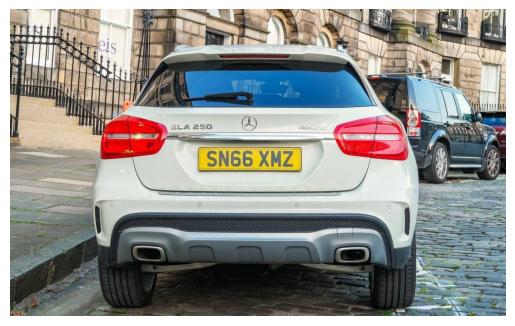

In [13]:

#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis("off")
plt.show()

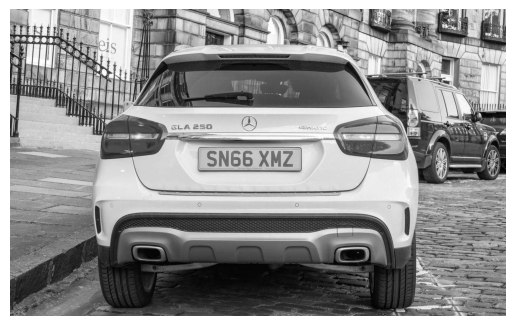

In [14]:
plt.imshow(gray, cmap="gray")
plt.axis("off")
plt.show()

In [15]:
model = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_russian_plate_number.xml")

In [17]:
plates = model.detectMultiScale(gray, scaleFactor=1.1, minSize = (30,30), minNeighbors=5)

In [20]:
plates

array([[360, 295, 330, 110]])

In [22]:
for x, y, w, h in plates:
    cv2.rectangle(image, (x,y), (x+w, y+h), (0, 255, 0), 3)

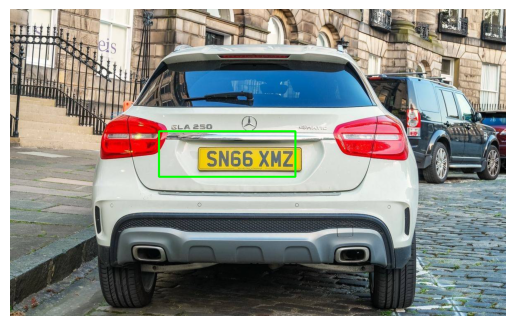

In [25]:
plt.imshow(image)
plt.axis("off")
plt.show()

### Putting it all together

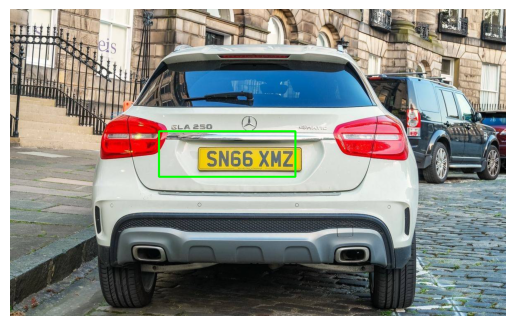

In [29]:
image = plt.imread("car1.jpg").copy()
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
model = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_russian_plate_number.xml")
plates = model.detectMultiScale(gray, scaleFactor=1.1, minSize = (30,30), minNeighbors=5)
for x, y, w, h in plates:
    cv2.rectangle(image, (x,y), (x+w, y+h), (0, 255, 0), 3)

plt.imshow(image)
plt.axis("off")
plt.show()

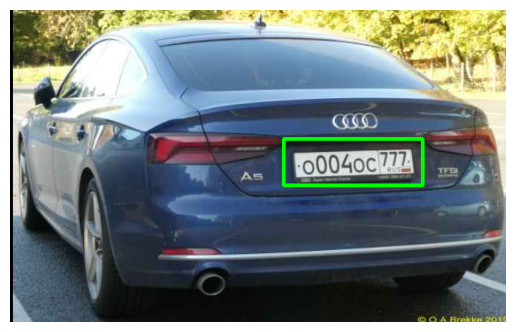

In [30]:
image = plt.imread("car2.jpg").copy()
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
model = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_russian_plate_number.xml")
plates = model.detectMultiScale(gray, scaleFactor=1.1, minSize = (30,30), minNeighbors=5)
for x, y, w, h in plates:
    cv2.rectangle(image, (x,y), (x+w, y+h), (0, 255, 0), 3)

plt.imshow(image)
plt.axis("off")
plt.show()

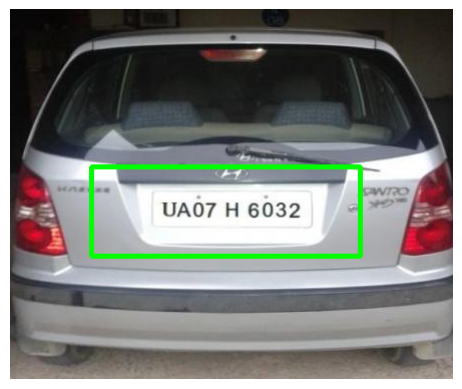

In [32]:
image = plt.imread("car3.jpg").copy()
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
model = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_russian_plate_number.xml")
plates = model.detectMultiScale(gray, scaleFactor=1.1, minSize = (30,30), minNeighbors=5)
for x, y, w, h in plates:
    cv2.rectangle(image, (x,y), (x+w, y+h), (0, 255, 0), 3)

plt.imshow(image)
plt.axis("off")
plt.show()

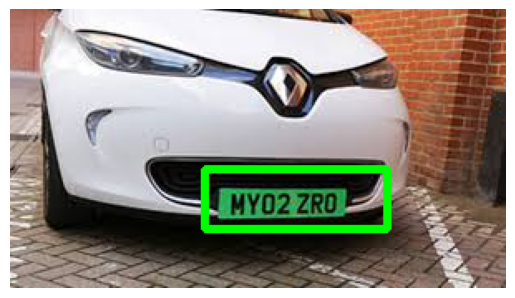

In [34]:
image = plt.imread("car4.jpg").copy()
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
model = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_russian_plate_number.xml")
plates = model.detectMultiScale(gray, scaleFactor=1.1, minSize = (30,30), minNeighbors=5)
for x, y, w, h in plates:
    cv2.rectangle(image, (x,y), (x+w, y+h), (0, 255, 0), 3)

plt.imshow(image)
plt.axis("off")
plt.show()

In [37]:
import easyocr
import matplotlib.pyplot as plt

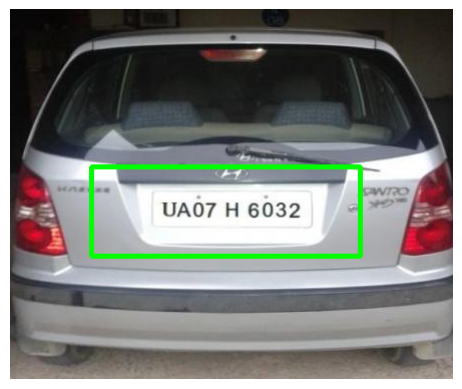

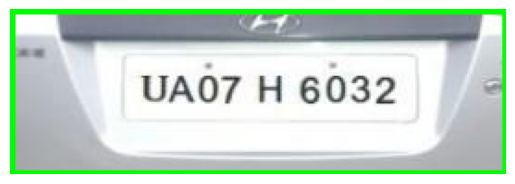

In [38]:
image = plt.imread("car3.jpg").copy()

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

model = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_russian_plate_number.xml")

plates = model.detectMultiScale(gray, scaleFactor=1.1, minSize = (30,30), minNeighbors=5)

for x, y, w, h in plates:
    cv2.rectangle(image, (x,y), (x+w, y+h), (0, 255, 0), 3)

plt.imshow(image)
plt.axis("off")
plt.show()

cropped_image = image[y:y+h, x:x+w]
plt.imshow(cropped_image)
plt.axis("off")
plt.show()

In [39]:
reader = easyocr.Reader(["en"])
cropped_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
results = reader.readtext(cropped_image)
results

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[68, 30], [212, 30], [212, 56], [68, 56]],
  'UAO7 H 6032',
  0.821341712707802)]

### Preprocessing

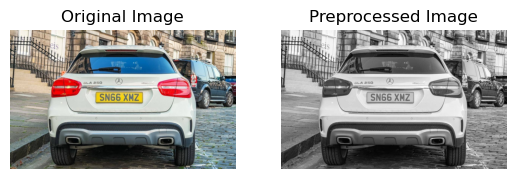

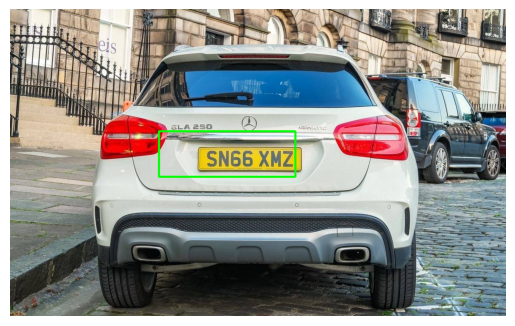

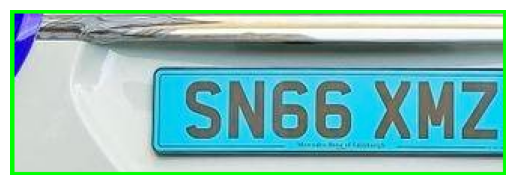

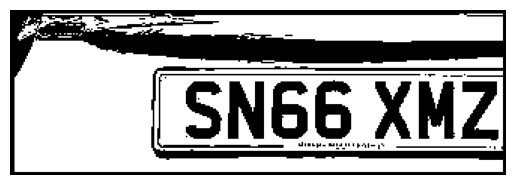

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


'SN66 XMZ'

In [41]:
image = cv2.imread("car1.jpg")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Denoise the Image
gray = cv2.GaussianBlur(gray, (1,1), 0)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(image_rgb)
ax[0].set_title("Original Image")
ax[0].axis("off")
ax[1].imshow(gray, cmap="gray")
ax[1].set_title("Preprocessed Image")
ax[1].axis("off")
plt.show()

model = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_russian_plate_number.xml")

plates = model.detectMultiScale(gray, scaleFactor=1.1, minSize = (30,30), minNeighbors=5)

for x, y, w, h in plates:
    cv2.rectangle(image, (x,y), (x+w, y+h), (0, 255, 0), 3)

image_rgb =cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis("off")
plt.show()

cropped_image = image[y:y+h, x:x+w]
plt.imshow(cropped_image)
plt.axis("off")
plt.show()

cropped_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
_, cropped_image = cv2.threshold(cropped_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.imshow(cropped_image, cmap="gray")
plt.axis("off")
plt.show()

reader = easyocr.Reader(["en"])
results = reader.readtext(cropped_image, detail=0)[0]
results
#plt.imshow(gray, cmap="gray")
#plt.axis("off")
#plt.show()

In [42]:
!pip install qrcode

In [43]:
import qrcode

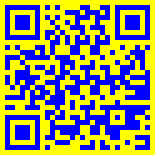

In [44]:
qr = qrcode.QRCode(version=3,
                  box_size=5,
                  border=1)

qr.add_data(results)
qr.make(fit=True)
qr_image = qr.make_image(fill_color="blue", back_color="yellow")
qr_image

In [45]:
import numpy as np

In [54]:
qr_image_np = np.array(qr_image.convert("RGB"))

In [56]:
cv2.imwrite(f"{results}.png", qr_image_np)

True

In [58]:
qr_code_input = cv2.imread(f"{results}.png")

In [60]:
qr_code_input.shape

(155, 155, 3)

(-0.5, 154.5, 154.5, -0.5)

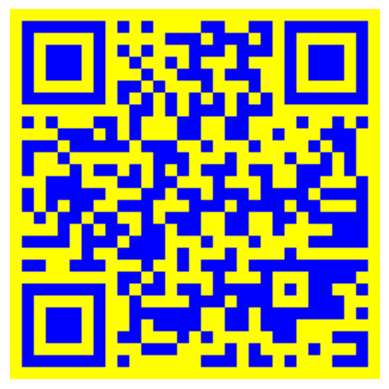

In [62]:
plt.imshow(qr_code_input)
plt.axis("off")

In [64]:
qr_detector = cv2.QRCodeDetector()
p1, p2, p3 = qr_detector.detectAndDecode(qr_code_input) # p1 = data, p2 = box, p3 = qr_code

In [66]:
p1

'SN66 XMZ'

In [68]:
p2

array([[[  5.,   5.],
        [149.,   5.],
        [149., 149.],
        [  5., 149.]]], dtype=float32)

In [70]:
p3

array([[  0,   0,   0,   0,   0,   0,   0, 255,   0, 255,   0, 255, 255,
        255, 255,   0,   0, 255, 255,   0,   0, 255,   0,   0,   0,   0,
          0,   0,   0],
       [  0, 255, 255, 255, 255, 255,   0, 255, 255, 255, 255, 255,   0,
          0,   0, 255,   0,   0,   0, 255,   0, 255,   0, 255, 255, 255,
        255, 255,   0],
       [  0, 255,   0,   0,   0, 255,   0, 255,   0, 255,   0, 255, 255,
        255,   0,   0,   0, 255,   0,   0,   0, 255,   0, 255,   0,   0,
          0, 255,   0],
       [  0, 255,   0,   0,   0, 255,   0, 255, 255,   0, 255, 255,   0,
        255,   0, 255, 255, 255,   0, 255, 255, 255,   0, 255,   0,   0,
          0, 255,   0],
       [  0, 255,   0,   0,   0, 255,   0, 255, 255, 255,   0, 255, 255,
          0,   0,   0, 255,   0,   0,   0, 255, 255,   0, 255,   0,   0,
          0, 255,   0],
       [  0, 255, 255, 255, 255, 255,   0, 255,   0,   0, 255,   0, 255,
        255, 255,   0, 255, 255, 255,   0, 255, 255,   0, 255, 255, 255,
    